In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import requests
from urllib.parse import urlencode

В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

### Описание данных
ad_id – идентификатор объявления (рекламы)  
xyz_campaign_id – идентификатор рекламной кампании в базе компании X  
fb_campaign_id – идентификатор кампании в Facebook  
age – возрастная группа, которой показывалась реклама  
gender – пол тех, кому показывалась реклама  
interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)  
impressions – число показов  
clicks – число кликов  
spent – сумма, которую компания потратила на показ объявления   
total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы  
approved_conversion – количество людей, которые купили продукт после просмотра рекламы  

In [2]:
# Ссылка с необходимыми данными
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Kl4mPINblwnJCA'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [3]:
# Загружаем данные из файла
conversion = pd.read_csv(download_url)

In [4]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
# Проверяем наличие пустых значений
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

1. Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения

In [6]:
conversion['Impressions_log'] = conversion.Impressions.apply(np.log)

In [7]:
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Impressions_log
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,8.902456
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,9.790375
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,6.541030
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,8.356790
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,8.326759
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,13.937527
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,13.365386
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,11.928546
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,13.580108


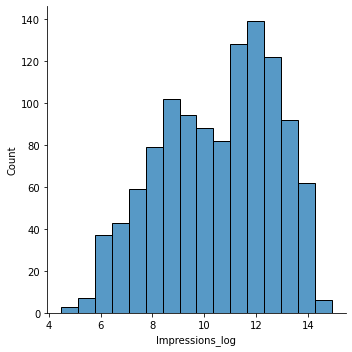

In [8]:
# Строим график распределения, где на оси X - прологарифмироавнное значение просмотров, на оси Y - количество объявлений
sns.displot(x=conversion.Impressions_log)
plt.show()

Распределение данных является бимодальным

2. Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов. Создайте новую колонку, затем посмотрите на описательные статистики.

In [9]:
# Добавляем колонку CTR к нашей таблице
conversion['CTR'] = conversion.Clicks.div(conversion.Impressions)

In [10]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Impressions_log,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,8.902456,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,9.790375,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,6.541030,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,8.356790,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,8.326759,0.000242


In [11]:
conversion.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

3. Визуализируйте CTR рекламной кампании под номером 916

In [12]:
# Отбираем данные рекламной компании 916
company_916 = conversion \
             .query('xyz_campaign_id == 916')

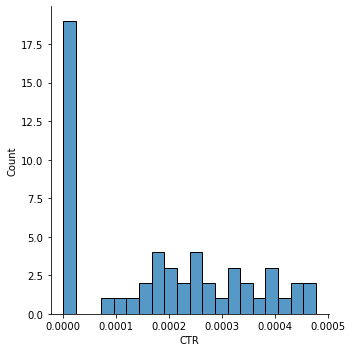

In [13]:
# График распределений рекламных объявлений компании 916
# На оси Х - соотношение числа кликов к показам, на оси Y количество объявлений
sns.displot(x=company_916.CTR, bins=20)

4. CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов.  
Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

In [14]:
# Создаем новый столбец с расчитанной CPC
conversion['CPC'] = conversion.Spent.div(conversion.Clicks)

In [15]:
# Выводим описательную статистику CPC
conversion.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [16]:
# Проверяем наличие пустых значений CPC
conversion.CPC.isna().sum()

207

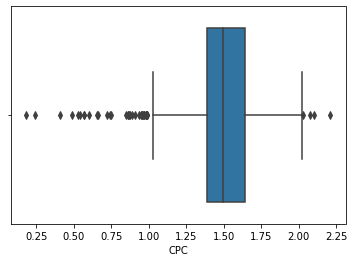

In [17]:
# Строим боксплот и убираем пустые значения CPC,
# так как нельзя расчитать метрику у объявления, у которого не было кликов
sns.boxplot(x=conversion.CPC.dropna())
plt.show()

In [18]:
# Считаем межквартилньый размах CPC
round(conversion.CPC.describe()[6] - conversion.CPC.describe()[4], 2)

0.25

5. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления

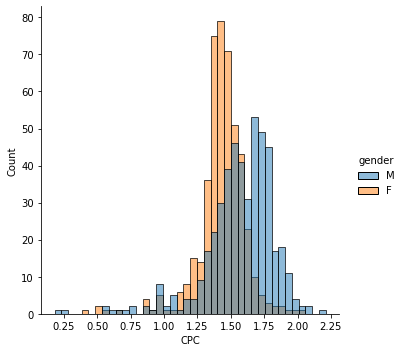

In [19]:
sns.displot(data=conversion.dropna(), x='CPC', hue='gender')

6. Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.  
Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. 

In [20]:
# Считаем метрику CR
conversion['CR'] = conversion.Approved_Conversion.div(conversion.Clicks).mul(100)

In [21]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Impressions_log,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,8.902456,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,9.790375,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,6.541030,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,8.356790,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,8.326759,0.000242,1.29,100.0


In [22]:
# Выводим CR необходимого рекламного объявления
round(float(conversion.query('ad_id == 1121814').CR), 2)

3.09